# Metrics and Plots for the trained models

In [237]:
seed=9

In [238]:
MAIN_DUMP=f'../../dump_seeds/dump_{seed}'
import os,sys
from joblib import Parallel, delayed,dump,load

sys.path.append(os.path.abspath('../../src/ml'))
from load_matrix import load_df
from model_trainer import MLModel
from utils import load_models

import pandas as pd

from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer


## v2.10

In [239]:
current_version='v2.10'
standard_models=load_models(MAIN_DUMP,version=current_version,normalization='standard')
robust_models=load_models(MAIN_DUMP,version=current_version,normalization='robust')
none_models =load_models(MAIN_DUMP,version=current_version,normalization='none')
log1p_models=load_models(MAIN_DUMP,version=current_version,normalization='log1p')
minmax_models=load_models(MAIN_DUMP,version=current_version,normalization='minmax')

In [240]:
collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for norm in ['none','robust','standard','log1p','minmax']:
        current_dict=eval(f"{norm}_models")
        for model_name, ml_model in current_dict.items():
                print(f'-- Evaluating model: {model_name} {current_version} {norm} --')
                y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
                metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
                metrics_list.append({
                        "model": ml_model.model_type,
                        "input": ml_model.dataset_name,
                        "normalization": norm,  
                        "version": current_version,
                        **metrics
                })

                collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)
results=pd.DataFrame(metrics_list)

# -- gex not related to version
results.loc[results['input']=='gene_expression', 'version'] = ''

-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_concatenated_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_gene_expression_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_RGCN_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: sklearn_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: sklearn_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: sklearn_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluatin

In [241]:
results[results['input']=='gene_expression'] # -- checking version

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
4,random_forest,gene_expression,none,,0.714115,0.860465,0.973684,0.913580,0.545073,0.961722,0.989846,0.092184
11,sklearn_mlp,gene_expression,none,,0.500000,0.775510,1.000000,0.873563,0.000000,0.500000,0.775510,0.227482
18,svm,gene_expression,none,,0.941388,0.973684,0.973684,0.973684,0.882775,0.976077,0.993772,0.052264
25,xgboost,gene_expression,none,,0.928230,0.972973,0.947368,0.960000,0.831005,0.964115,0.991289,0.062905


In [242]:
results_10=results

In [243]:
results.loc[results['model']=='svm']

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
14,svm,Complex_protein_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.944976,0.983191,0.094084
15,svm,Complex_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.471292,0.772835,0.174168
16,svm,concatenated_protein_embeddings,none,v2.10,0.862440,0.968750,0.815789,0.885714,0.635411,0.935407,0.982124,0.084609
17,svm,concatenated_sample_embeddings,none,v2.10,0.627990,0.843750,0.710526,0.771429,0.224386,0.751196,0.911020,0.158547
18,svm,gene_expression,none,,0.941388,0.973684,0.973684,0.973684,0.882775,0.976077,0.993772,0.052264
19,svm,RGCN_protein_embeddings,none,v2.10,0.862440,0.968750,0.815789,0.885714,0.635411,0.935407,0.982124,0.084609
20,svm,RGCN_sample_embeddings,none,v2.10,0.627990,0.843750,0.710526,0.771429,0.224386,0.751196,0.911020,0.158547
34,svm,Complex_protein_embeddings,robust,v2.10,0.655502,0.837209,0.947368,0.888889,0.395863,0.916268,0.977384,0.104498
35,svm,concatenated_protein_embeddings,robust,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.614833,0.842540,0.174604
36,svm,RGCN_protein_embeddings,robust,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.614833,0.842540,0.174603


## v2.11

In [244]:
current_version='v2.11'
standard_models=load_models(MAIN_DUMP,version=current_version,normalization='standard')
robust_models=load_models(MAIN_DUMP,version=current_version,normalization='robust')
none_models =load_models(MAIN_DUMP,version=current_version,normalization='none')
log1p_models=load_models(MAIN_DUMP,version=current_version,normalization='log1p')
minmax_models=load_models(MAIN_DUMP,version=current_version,normalization='minmax')

collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for norm in ['none','robust','standard','log1p','minmax']:
        current_dict=eval(f"{norm}_models")
        for model_name, ml_model in current_dict.items():
                print(f'-- Evaluating model: {model_name} {current_version} {norm} --')
                y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
                metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
                metrics_list.append({
                        "model": ml_model.model_type,
                        "input": ml_model.dataset_name,
                        "normalization": norm,  
                        "version": current_version,
                        **metrics
                })

                collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)
results=pd.DataFrame(metrics_list)
results.loc[results['input']=='gene_expression', 'version'] = ''

-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_concatenated_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_RGCN_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_RGCN_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_concatenated_sample_embeddings_gridsearch_model.joblib v2.11 none --

In [245]:
results_11=results

### saving csv

In [246]:
results_10.to_csv(f'../../results/score_tables/scores_v2.10_seed{seed}.csv',index=False)
results_11.to_csv(f'../../results/score_tables/scores_v2.11_seed{seed}.csv',index=False)

all_results=pd.concat([results_10,results_11],axis=0)
all_results.to_csv(f'../../results/score_tables/scores_all_seed{seed}.csv',index=False)

### analysis

In [247]:
from IPython.display import display
display(all_results)

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,random_forest,Complex_protein_embeddings,none,v2.10,0.915072,0.972222,0.921053,0.945946,0.784546,0.956938,0.987954,0.071324
1,random_forest,Complex_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.339713,0.716910,0.195579
2,random_forest,concatenated_protein_embeddings,none,v2.10,0.928230,0.972973,0.947368,0.960000,0.831005,0.935407,0.980247,0.080021
3,random_forest,concatenated_sample_embeddings,none,v2.10,0.486842,0.770833,0.973684,0.860465,-0.077658,0.531100,0.857195,0.183408
4,random_forest,gene_expression,none,,0.714115,0.860465,0.973684,0.913580,0.545073,0.961722,0.989846,0.092184
...,...,...,...,...,...,...,...,...,...,...,...,...
67,svm,concatenated_protein_embeddings,minmax,v2.11,0.875598,0.969697,0.842105,0.901408,0.668382,0.933014,0.980298,0.095506
68,svm,RGCN_protein_embeddings,minmax,v2.11,0.875598,0.969697,0.842105,0.901408,0.668382,0.933014,0.980298,0.095506
69,xgboost,Complex_protein_embeddings,minmax,v2.11,0.706938,0.868421,0.868421,0.868421,0.413876,0.918660,0.978005,0.110757
70,xgboost,concatenated_protein_embeddings,minmax,v2.11,0.706938,0.868421,0.868421,0.868421,0.413876,0.918660,0.977969,0.112612


### averaging

In [356]:
# -- take all seed files and make an average dataframe of all seeds
df0 = pd.read_csv('../../results/score_tables/scores_all_seed0.csv'); df0['seed'] = 0
df1 = pd.read_csv('../../results/score_tables/scores_all_seed1.csv'); df1['seed'] = 1
df2 = pd.read_csv('../../results/score_tables/scores_all_seed2.csv'); df2['seed'] = 2
df3 = pd.read_csv('../../results/score_tables/scores_all_seed3.csv'); df3['seed'] = 3
df4 = pd.read_csv('../../results/score_tables/scores_all_seed4.csv'); df4['seed'] = 4
df5 = pd.read_csv('../../results/score_tables/scores_all_seed5.csv'); df5['seed'] = 5
df6 = pd.read_csv('../../results/score_tables/scores_all_seed6.csv'); df6['seed'] = 6
df7 = pd.read_csv('../../results/score_tables/scores_all_seed7.csv'); df7['seed'] = 7
df8 = pd.read_csv('../../results/score_tables/scores_all_seed8.csv'); df8['seed'] = 8
df9 = pd.read_csv('../../results/score_tables/scores_all_seed9.csv'); df9['seed'] = 9


dfs = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9]


# concatenate all seeds
all_df = pd.concat(dfs)

# -- those who have null version => "no version"
all_df['version'] = all_df['version'].fillna('no version').replace('', 'no version')
all_df

avg_df = all_df.groupby(['model','input','normalization','version']).mean().reset_index().drop(columns=['seed'], errors='ignore')
std_df = all_df.groupby(['model','input','normalization','version']).std().reset_index().drop(columns=['seed'], errors='ignore')

In [357]:
# -- remove the seed col
all_df['input']=='gene_expression'

0      False
1      False
2      False
3      False
4       True
       ...  
143    False
144    False
145    False
146    False
147    False
Name: input, Length: 1480, dtype: bool

In [359]:
# -- save all_df
all_df.to_csv('../../results/score_tables/scores_all_seeds.csv',index=False)
avg_df.to_csv('../../results/score_tables/scores_avg_seeds.csv',index=False)
std_df.to_csv('../../results/score_tables/scores_std_seeds.csv',index=False)

In [358]:
avg_df['input'].unique()

array(['Complex_protein_embeddings', 'Complex_sample_embeddings',
       'RGCN_protein_embeddings', 'RGCN_sample_embeddings',
       'concatenated_protein_embeddings',
       'concatenated_sample_embeddings', 'gene_expression'], dtype=object)

## Viz

In [362]:
version='v2.11'
norm='none'
df=avg_df
filtered_results=df[((df['version']==version) | (df['input']=='gene_expression')) & (df['normalization']==norm)]
# --remove last 4 rows which are duplicates of gene_expression with different version (ne seed version with 2 gex for 2 versions)
# filtered_results=filtered_results[:-5]
# -- add those with gene_expression input if not there (v2.11)



In [363]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
5,random_forest,Complex_protein_embeddings,none,v2.11,0.831699,0.915081,0.981579,0.946884,0.741549,0.973565,0.992564,0.070984
11,random_forest,Complex_sample_embeddings,none,v2.11,0.498684,0.775043,0.997368,0.872253,-0.007766,0.463876,0.776557,0.190774
17,random_forest,RGCN_protein_embeddings,none,v2.11,0.765311,0.886959,0.957895,0.920295,0.610138,0.914833,0.970135,0.098448
23,random_forest,RGCN_sample_embeddings,none,v2.11,0.675359,0.852107,0.905263,0.876393,0.383758,0.795694,0.925476,0.145935
29,random_forest,concatenated_protein_embeddings,none,v2.11,0.795215,0.900055,0.963158,0.930088,0.662050,0.958373,0.987473,0.078382
35,random_forest,concatenated_sample_embeddings,none,v2.11,0.617703,0.822491,0.926316,0.870957,0.302576,0.804785,0.919787,0.140311
36,random_forest,gene_expression,none,no version,0.701914,0.853740,0.994737,0.918703,0.570990,0.967823,0.990010,0.091307
42,sklearn_mlp,Complex_protein_embeddings,none,v2.11,0.842703,0.922295,0.976316,0.947870,0.752041,0.966986,0.989678,0.062763
48,sklearn_mlp,Complex_sample_embeddings,none,v2.11,0.515789,0.781271,0.931579,0.849502,0.071925,0.514115,0.803888,0.222233
54,sklearn_mlp,RGCN_protein_embeddings,none,v2.11,0.500000,0.620408,0.800000,0.698851,0.000000,0.500000,0.775510,0.335388


### 1. grouped bar plots

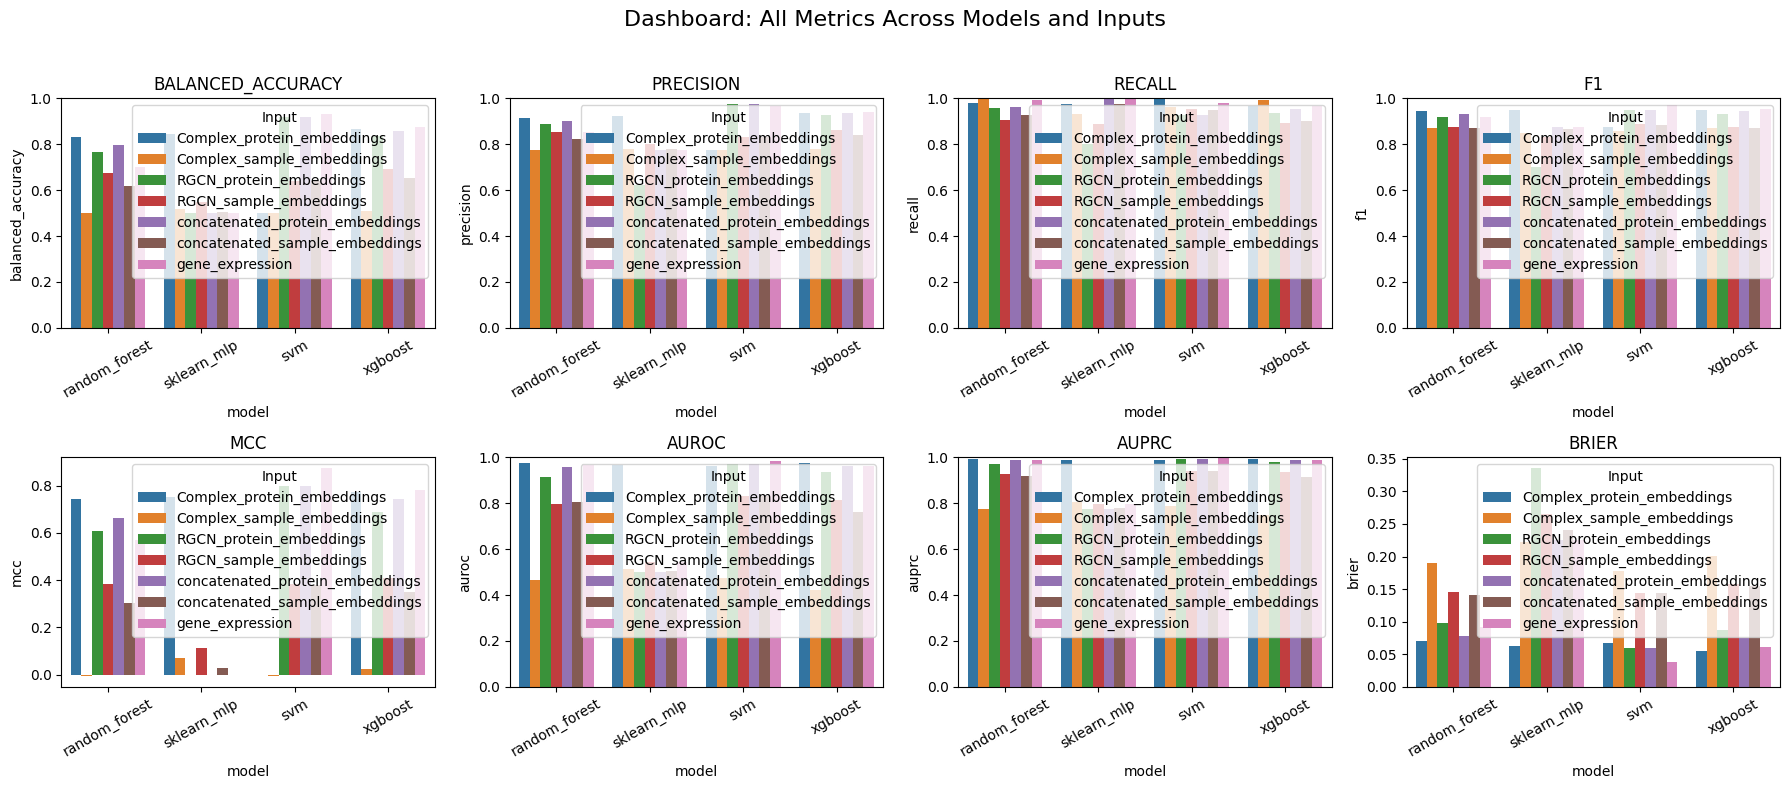

In [364]:
collector = ResultsCollector()
dashboard = DashboardVisualizer(filtered_results, collector)
dashboard.plot_metric_grid()

### 2. heatmap

model_dataset x score matrix 

In [250]:
# metric='balanced_accuracy'

In [365]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
5,random_forest,Complex_protein_embeddings,none,v2.11,0.831699,0.915081,0.981579,0.946884,0.741549,0.973565,0.992564,0.070984
11,random_forest,Complex_sample_embeddings,none,v2.11,0.498684,0.775043,0.997368,0.872253,-0.007766,0.463876,0.776557,0.190774
17,random_forest,RGCN_protein_embeddings,none,v2.11,0.765311,0.886959,0.957895,0.920295,0.610138,0.914833,0.970135,0.098448
23,random_forest,RGCN_sample_embeddings,none,v2.11,0.675359,0.852107,0.905263,0.876393,0.383758,0.795694,0.925476,0.145935
29,random_forest,concatenated_protein_embeddings,none,v2.11,0.795215,0.900055,0.963158,0.930088,0.662050,0.958373,0.987473,0.078382
35,random_forest,concatenated_sample_embeddings,none,v2.11,0.617703,0.822491,0.926316,0.870957,0.302576,0.804785,0.919787,0.140311
36,random_forest,gene_expression,none,no version,0.701914,0.853740,0.994737,0.918703,0.570990,0.967823,0.990010,0.091307
42,sklearn_mlp,Complex_protein_embeddings,none,v2.11,0.842703,0.922295,0.976316,0.947870,0.752041,0.966986,0.989678,0.062763
48,sklearn_mlp,Complex_sample_embeddings,none,v2.11,0.515789,0.781271,0.931579,0.849502,0.071925,0.514115,0.803888,0.222233
54,sklearn_mlp,RGCN_protein_embeddings,none,v2.11,0.500000,0.620408,0.800000,0.698851,0.000000,0.500000,0.775510,0.335388


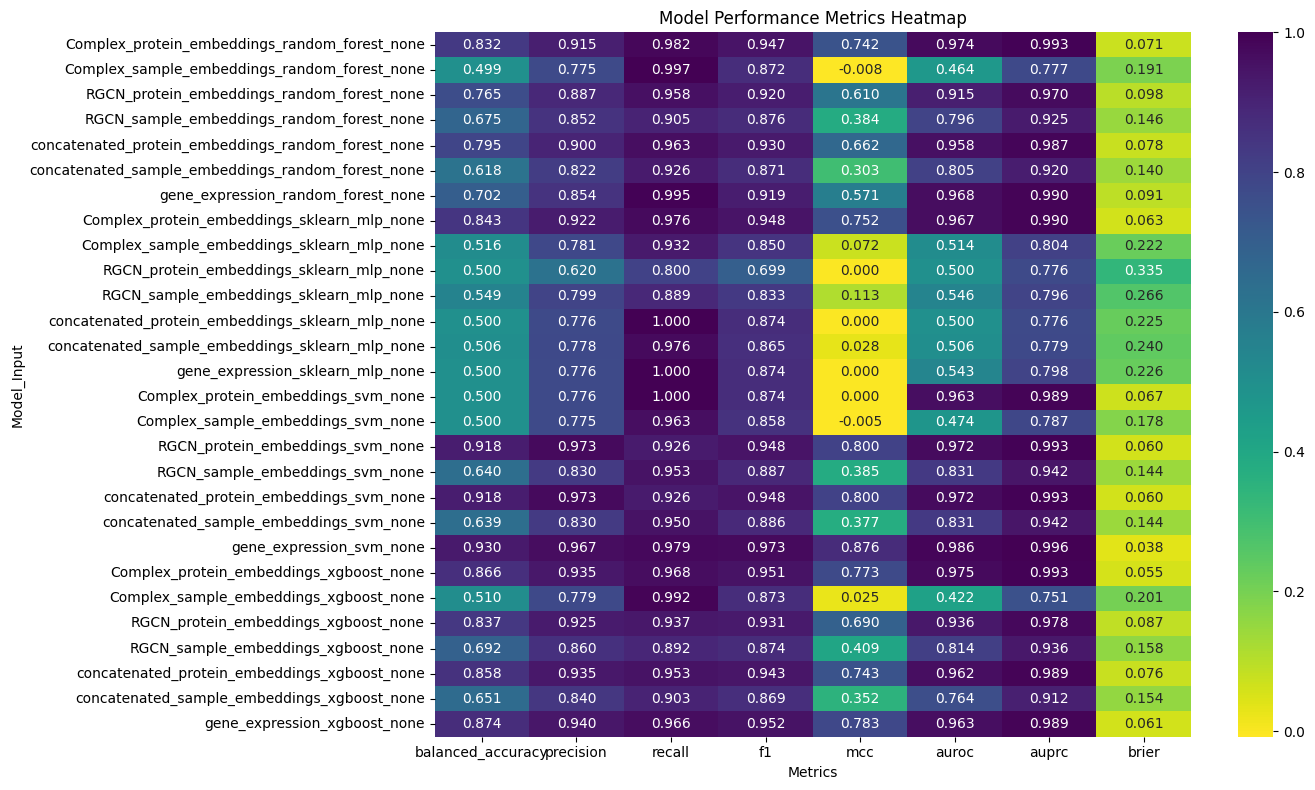

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['balanced_accuracy', 'precision', 'recall', 'f1', 'mcc', 'auroc','auprc','brier']
filtered_results['model_input'] = filtered_results['input'] + '_' + filtered_results['model'] + '_' + filtered_results['normalization']
heatmap_data = filtered_results.set_index('model_input')[metrics]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap="viridis_r", fmt=".3f")
plt.title("Model Performance Metrics Heatmap")
plt.ylabel("Model_Input")
plt.xlabel("Metrics")

plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


### 3. radar plot

To be more readbale better make a radar plot per model (one for svm, one for xgboost...)

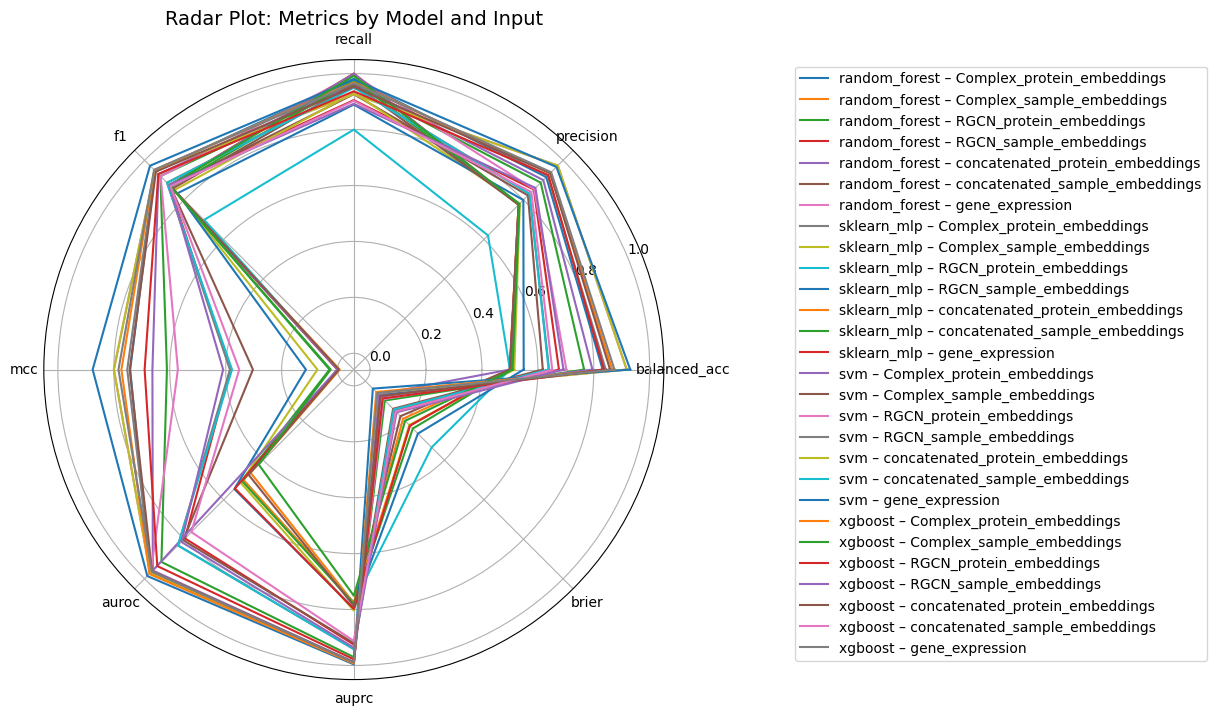

In [369]:
dashboard.plot_radar()

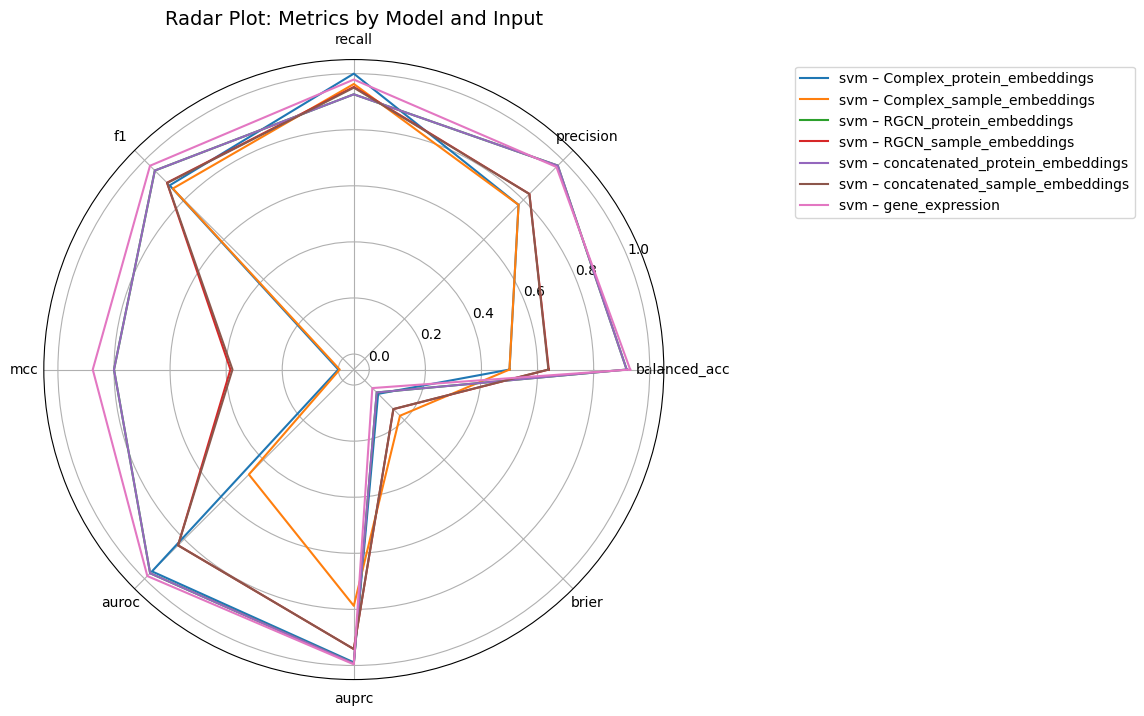

In [370]:
collector = ResultsCollector()
svm_filtered_results=filtered_results[filtered_results['model']=='svm']
dashboard = DashboardVisualizer(svm_filtered_results, collector)
dashboard.plot_radar()

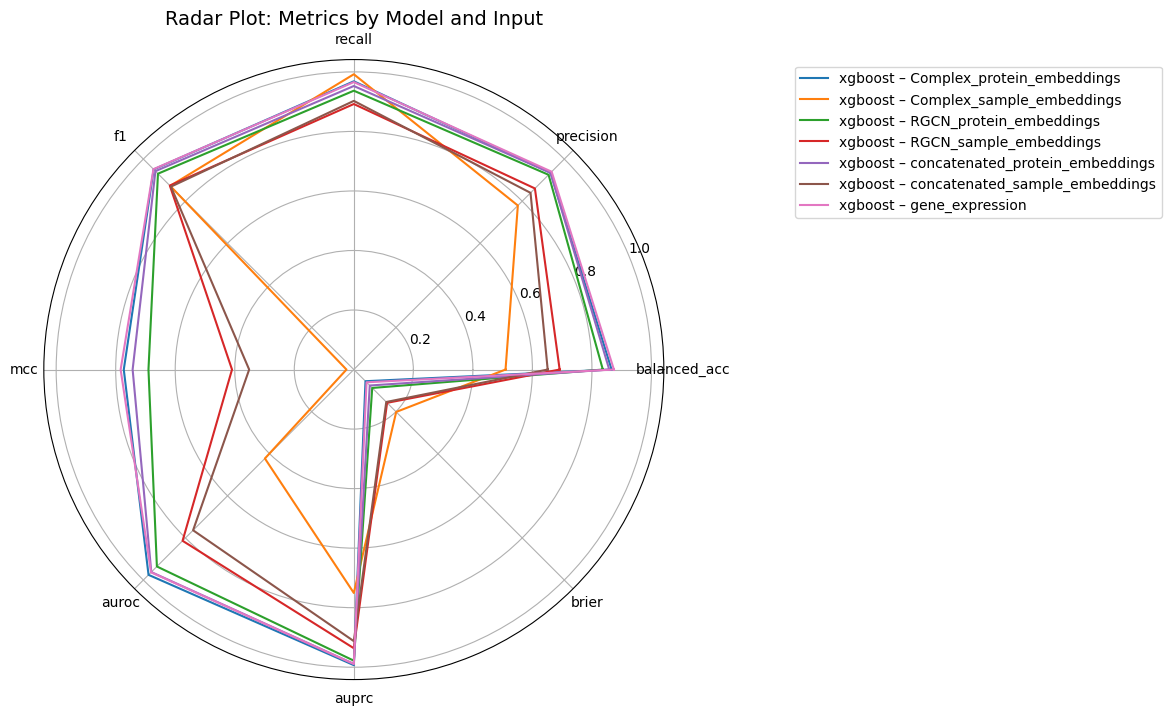

In [371]:
collector = ResultsCollector()
xgboost_filtered_results=filtered_results[filtered_results['model']=='xgboost']
dashboard = DashboardVisualizer(xgboost_filtered_results, collector)
dashboard.plot_radar()


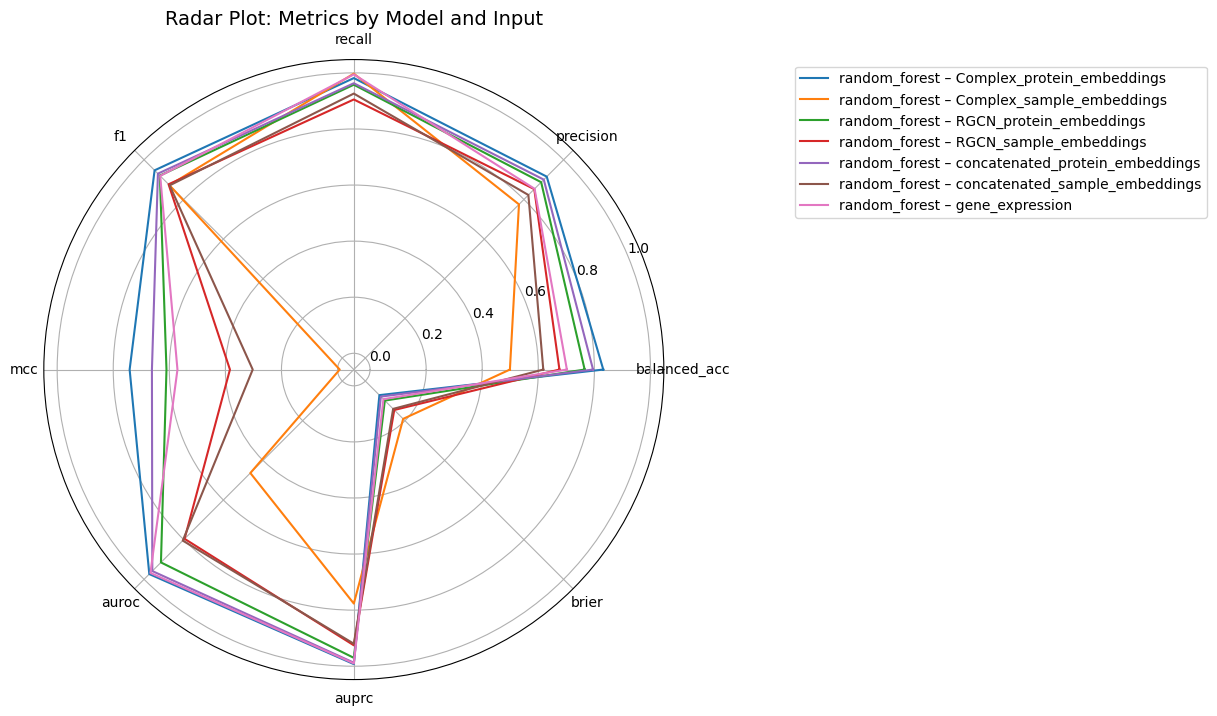

In [372]:
collector = ResultsCollector()
random_forest_filtered_results=filtered_results[filtered_results['model']=='random_forest']
dashboard = DashboardVisualizer(random_forest_filtered_results, collector)
dashboard.plot_radar()

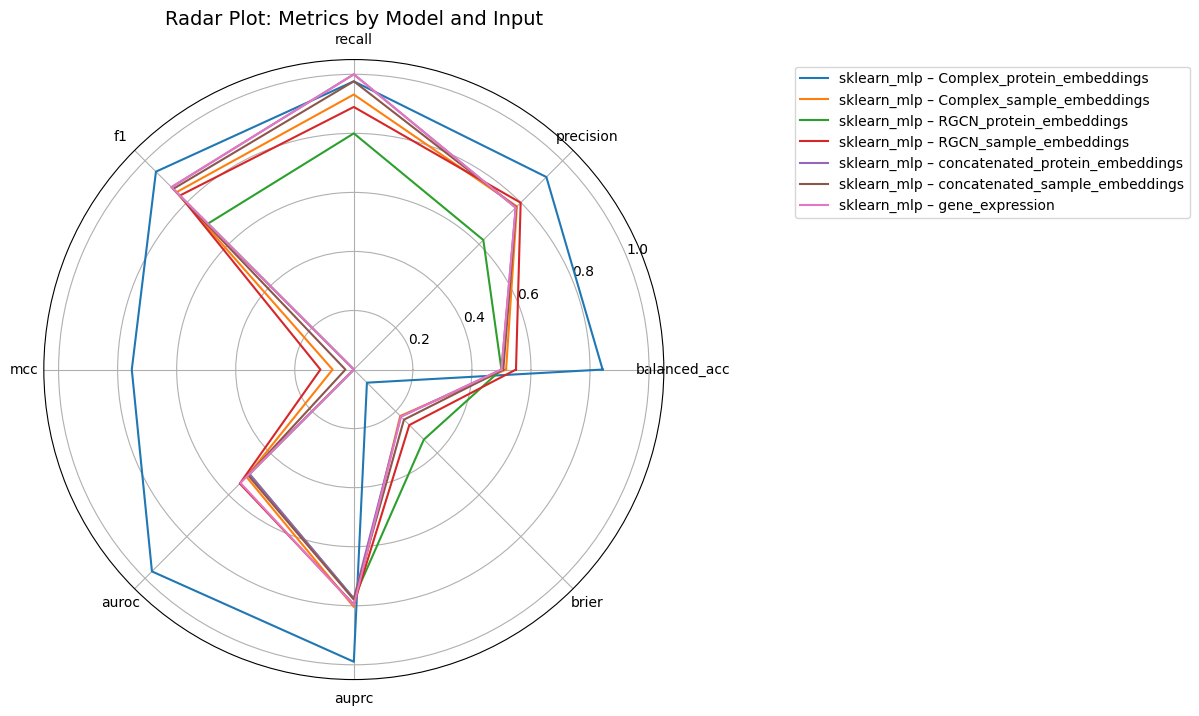

In [373]:
collector = ResultsCollector()
sklearn_mlp_filtered_results=filtered_results[filtered_results['model']=='sklearn_mlp']
dashboard = DashboardVisualizer(sklearn_mlp_filtered_results, collector)
dashboard.plot_radar()

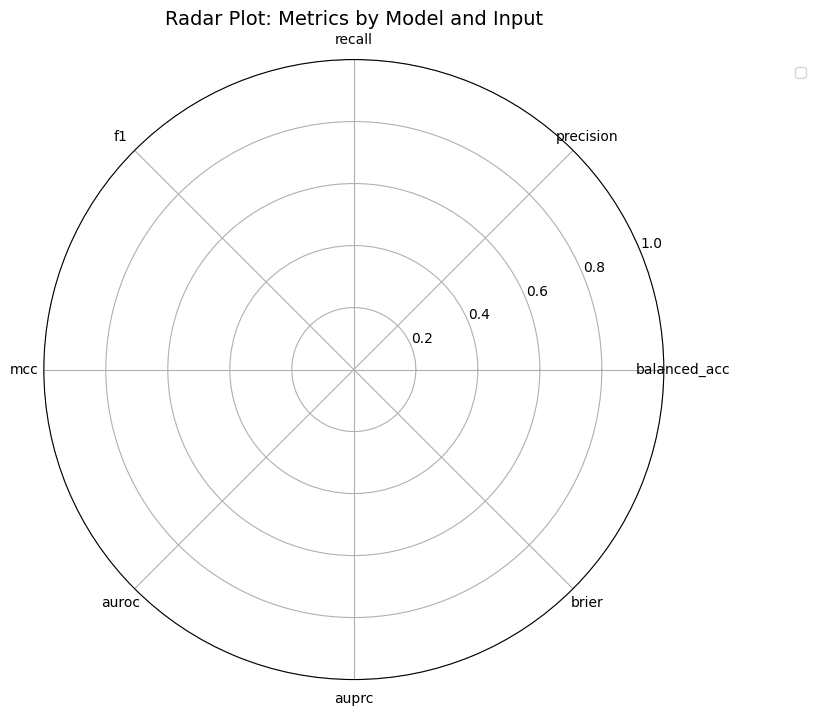

In [258]:
collector = ResultsCollector()
pytorch_mlp_filtered_results=filtered_results[filtered_results['model']=='pytorch_mlp']
dashboard = DashboardVisualizer(pytorch_mlp_filtered_results, collector)
dashboard.plot_radar()

### 5. scatter plot

somparing 2 strong(?) models, each point is a dataset+metrix, can have shape of point by metric and color by dataset (or just for one metric for now)

In [374]:
metric='precision'

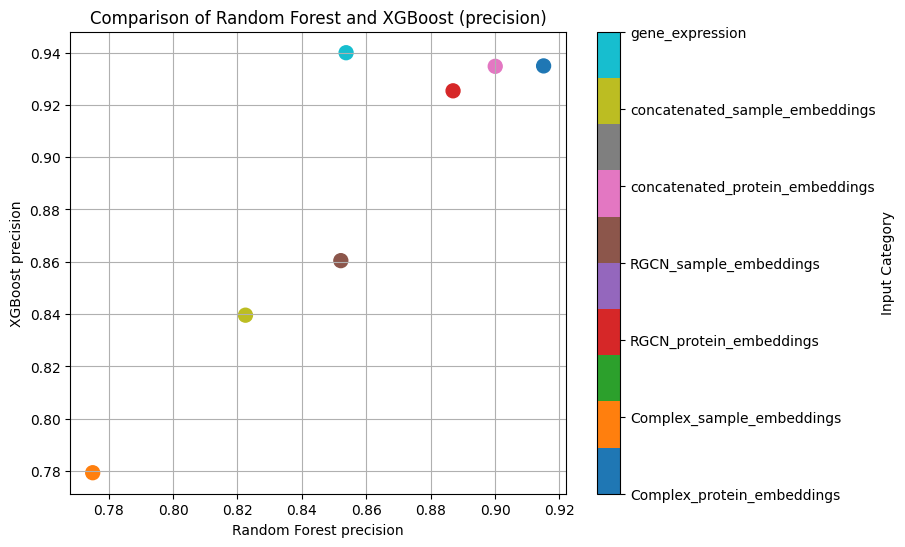

In [375]:
import matplotlib.pyplot as plt

rf = filtered_results[filtered_results['model'] == 'random_forest'][['input', metric]]
xgb = filtered_results[filtered_results['model'] == 'xgboost'][['input', metric]]

merged = rf.merge(xgb, on='input', suffixes=('_rf', '_xgb'))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    merged[metric + '_rf'],
    merged[metric + '_xgb'],
    s=100,
    c=merged['input'].astype('category').cat.codes,
    cmap='tab10'
)

plt.xlabel('Random Forest ' + metric)
plt.ylabel('XGBoost ' + metric)
plt.title('Comparison of Random Forest and XGBoost (' + metric + ')')
plt.grid()

cbar = plt.colorbar(scatter)
cbar.set_label('Input Category')
cbar.set_ticks(range(len(merged['input'].astype('category').cat.categories)))
cbar.set_ticklabels(merged['input'].astype('category').cat.categories)

plt.show()


### 6. rank dist plot
showing the rank distribution of models over datasets for a given metric

In [376]:
metric='balanced_accuracy'

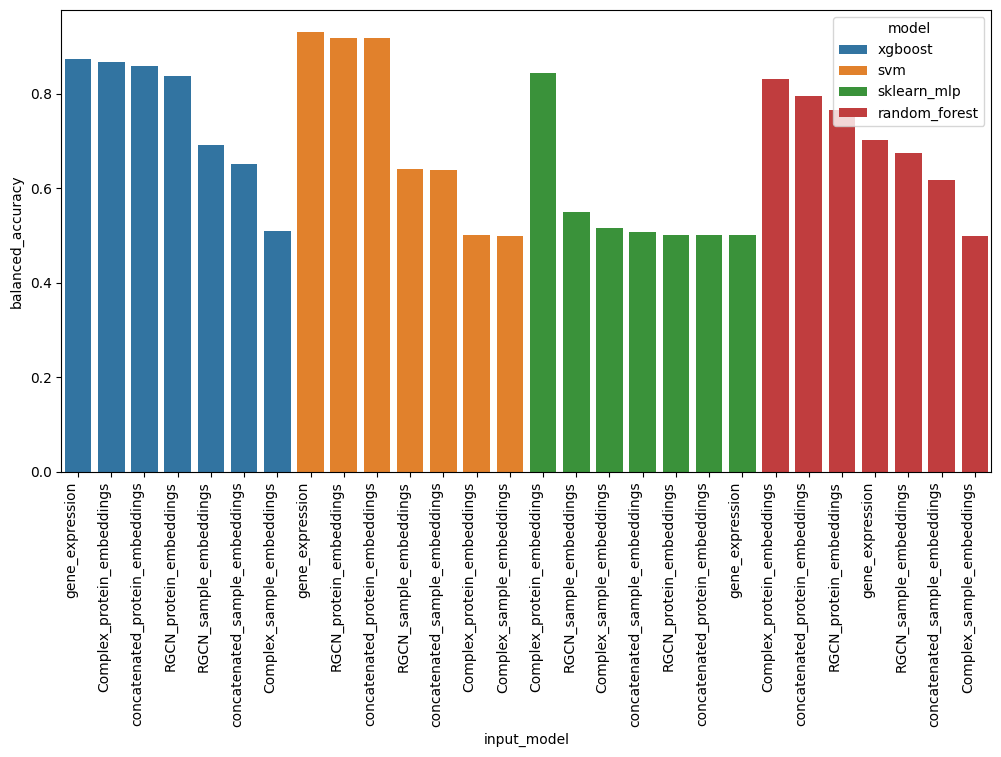

In [377]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- df sorted by model then by metric
sorted_df=filtered_results.sort_values(by=['model', metric],ascending=False)
sorted_df['input_model']=sorted_df['input']+'_'+sorted_df['model']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_df, x='input_model', y=metric, hue='model', dodge=False, palette='tab10')

ax.set_xticks(range(len(sorted_df)))
ax.set_xticklabels(sorted_df['input'], rotation=90, ha='right', fontsize=10)

# # bar plot and color by model
# plt.figure(figsize=(12, 6))
# sns.barplot(data=sorted_df, x='input_model', y=metric,hue='model')
# plt.title(f'Model Performance by {metric.capitalize()}')
# plt.xlabel('trained model')
# plt.ylabel(metric.capitalize())
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.legend(title='Model')
# plt.tight_layout()
plt.show()